# Econ 490: Combining Graphs (10)

## Prerequisites 

1. Be able to effectively use Stata do-files and generate log-files.
2. Be able to change your directory so that Stata can find your files.
3. Import datasets in csv and dta format. 
4. Save data files. 
5. Use the command `twoway`.

## Learning Outcomes 

1. Know how to combine and save graphs using the commands `graph combine` and `graph export`.


<div class="alert alert-block alert-info">
<b>Note:</b> Your best approach to completing this module is to copy and paste these commands into a do-file in Stata. Because Stata produces graphs in a separate window, Jupyter Notebooks will not produce a graph that you can see when you execute the commands on this page. The most we can do is export image files to a directory on your computer. You will see these commands whenever a graph is produced below. 
</div>

We'll continue working with the fake data data set we have been using as we work developing our research skills. Recall that this data set is simulating information for workers in the years 1982-2012 in a fake country where a training program was introduced in 2003 to boost their earnings. 

In [1]:
import stata_setup
stata_setup.config('C:\Program Files\Stata18/','se')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\irene\AppData\Local\Temp\ipykernel_8600\4069384911.py:2: SyntaxWarning: invalid escape sequence '\P'
  stata_setup.config('C:\Program Files\Stata18/','se')



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 19 Aug 2024
Serial number: 401809301518
  Licensed to: Irene Berezin
               UBC

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
>>> import sys
>>> sys.path.append('/Applications/Stata/utilities') # make sure this is the same as what you set up in Module - 1, Section 1.5.1: Setting Up PyStata
>>> from pystata import config
>>> config.init('se')

In [3]:
%%stata

use fake_data, clear 


. 
. use fake_data, clear 

. 


In this module, we will we will work on two examples. The first example covers combining two graphs with the same schema, while the second covers combining two graphs with different schemas.

## 10.1 Example 1
For this example, we want to generate two graphs with the same schema (they are the same type of graph and use the same variables as their x and y axis) and combine them using the `graph combine` command. Let's begin by setting up the data. We are going to first generate a new variable that shows the logarithm of workers' earnings. As explained in previous modules, collapsing data is irreversible; therefore, we can `preserve` the data set before we collapse it. Then, once we don't want to use the collapsed version of the data set anymore, we can `reverse` it back to the original data set we preserved. Therefore,  we are going to preserve our data set and then collapse it by variables `treated` and `year`. This way our data has no two unique ids, `treated` and `year`. 

In [4]:
%%stata

gen log_earnings = log(earnings)
la var log_earnings "Log-earnings"

preserve

collapse (mean) log_earnings, by(region treated year)


. 
. gen log_earnings = log(earnings)

. la var log_earnings "Log-earnings"

. 
. preserve

. 
. collapse (mean) log_earnings, by(region treated year)

. 


Now that we have our data prepared, we can start generating the two graphs and combine them using the `graph combine` command. We want these graphs to compare log-earnings between the control and treated groups in regions 1 and 2. To do this, we can create one graph that compares log-earnings between control and treated groups in region 1 and another that does the same comparison for region 2.

Note that because the commands are so long it is clearer for us to run them using `///` at indicate to that the command continues on the next line. You will not be able to execute multi-line commands in the Command Window; they will need to included in a do-file. Note that we also indent the lines to make it easier to read the complete command. 


. 
. *** Generate graph for Region 1 ***
. 
. twoway (connected log_earnings year if region==1 & treated==1)      ///
>     (connected log_earnings year if region==1 & treated==0),        ///
>         xline(2002, lpattern(dash))                                 /// 
>         ylab(9.5(0.5)11)                                            ///
>         ytitle("Log-earnings") xtitle("Year")                       ///
>         legend( label(1 "Treated") label(2 "Control"))              ///
>         aspectratio(1)                                              ///
>         title("Region 1") name("R1", replace)

. 


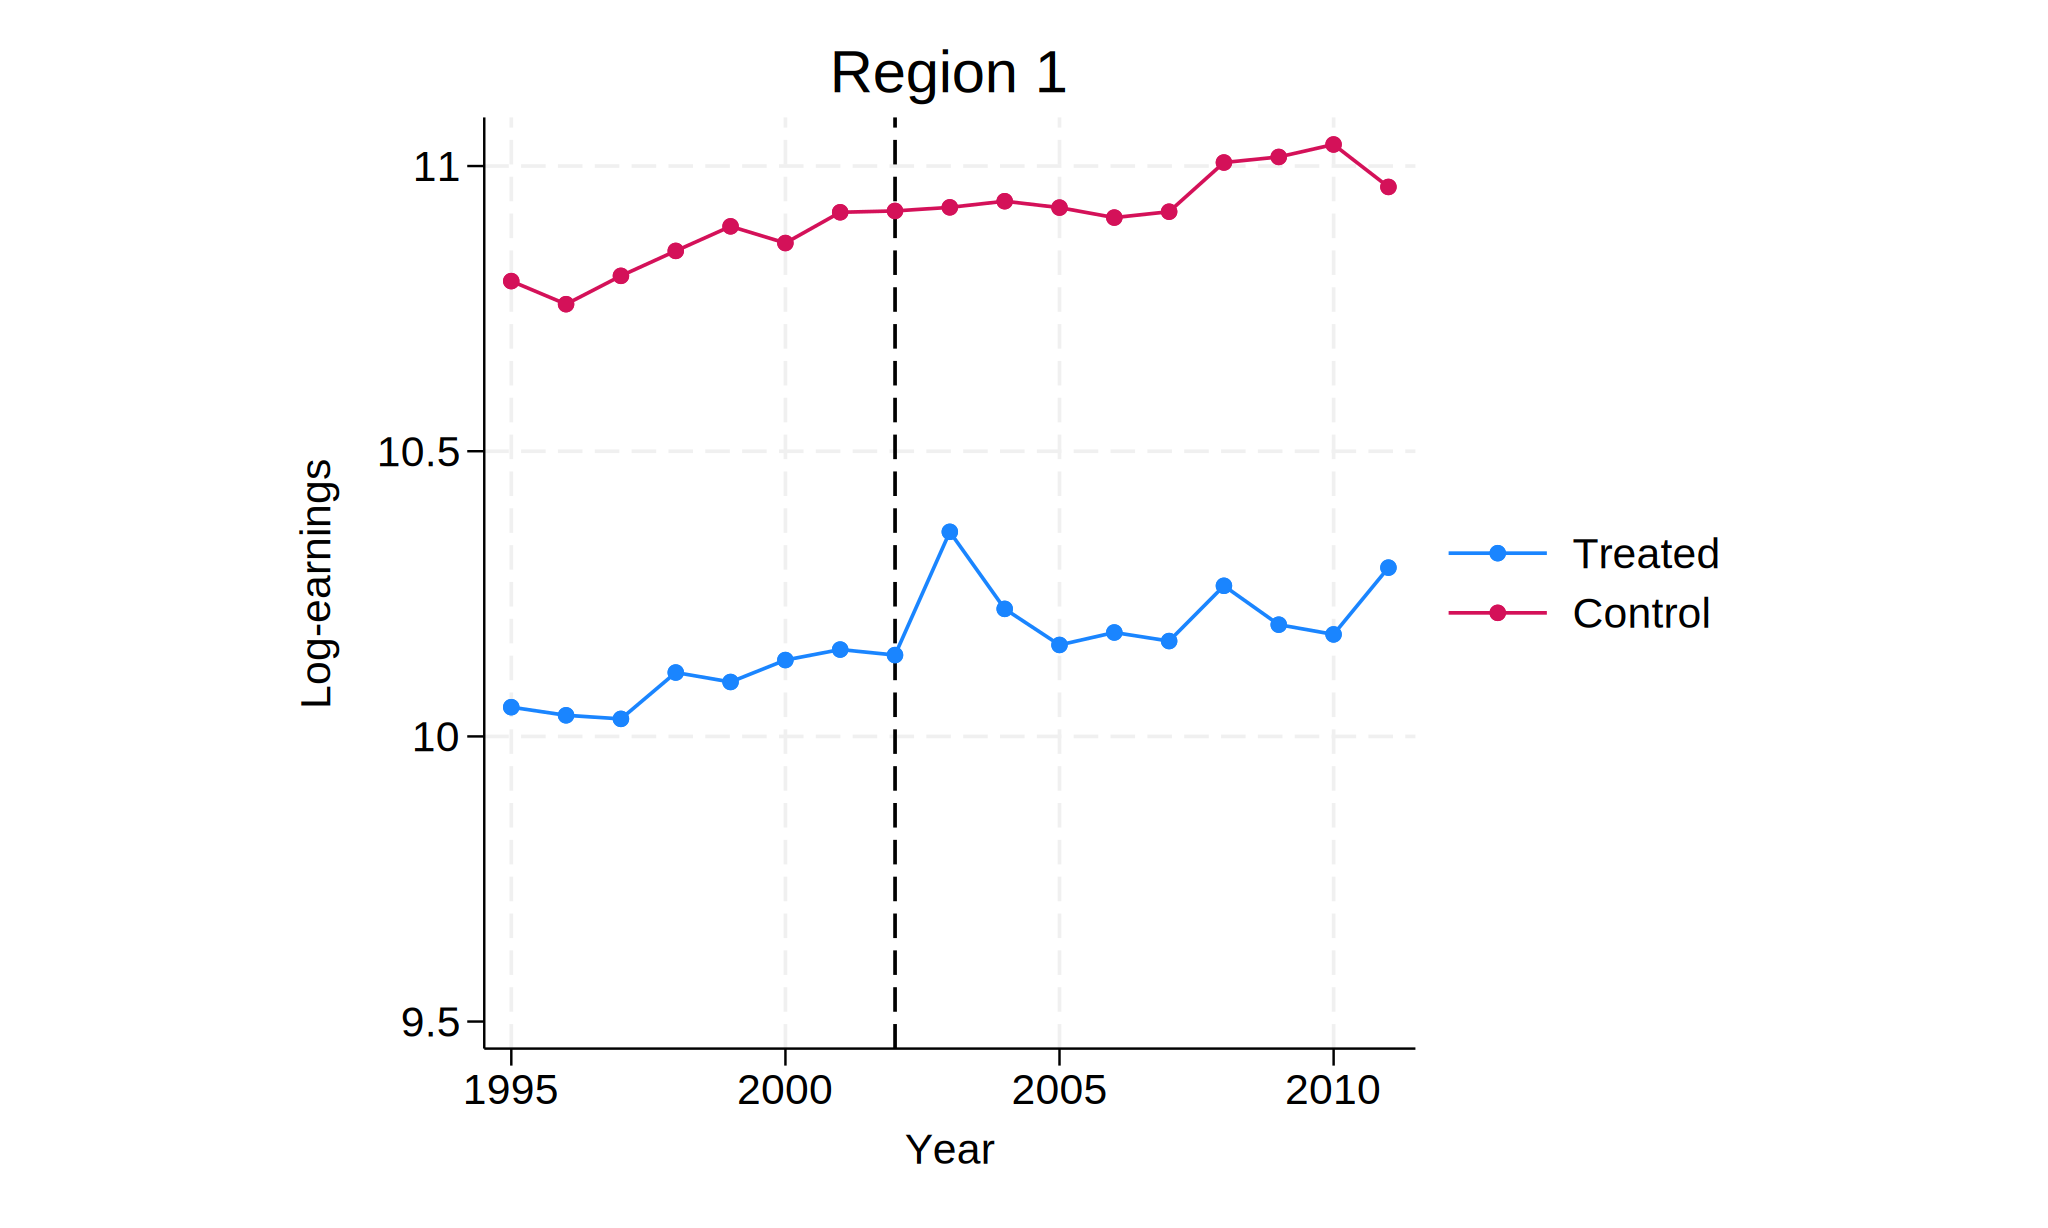

In [5]:
%%stata

*** Generate graph for Region 1 ***

twoway (connected log_earnings year if region==1 & treated==1)      ///
    (connected log_earnings year if region==1 & treated==0),        ///
        xline(2002, lpattern(dash))                                 /// 
        ylab(9.5(0.5)11)                                            ///
        ytitle("Log-earnings") xtitle("Year")                       ///
        legend( label(1 "Treated") label(2 "Control"))              ///
        aspectratio(1)                                              ///
        title("Region 1") name("R1", replace)


. 
. *** Generate graph for Region 2 ***
. 
. twoway (connected log_earnings year if region==2 & treated) ||      ///
>     (connected log_earnings year if region==2 & !treated),          ///
>         xline(2002, lpattern(dash))                                 ///
>         ylab(9.5(0.5)11)                                            ///
>         ytitle("Log-earnings") xtitle("Year")                       ///
>         legend( label(1 "Treated") label(2 "Control"))              ///
>         aspectratio(1)                                              ///
>         title("Region 2") name("R2", replace)

. 


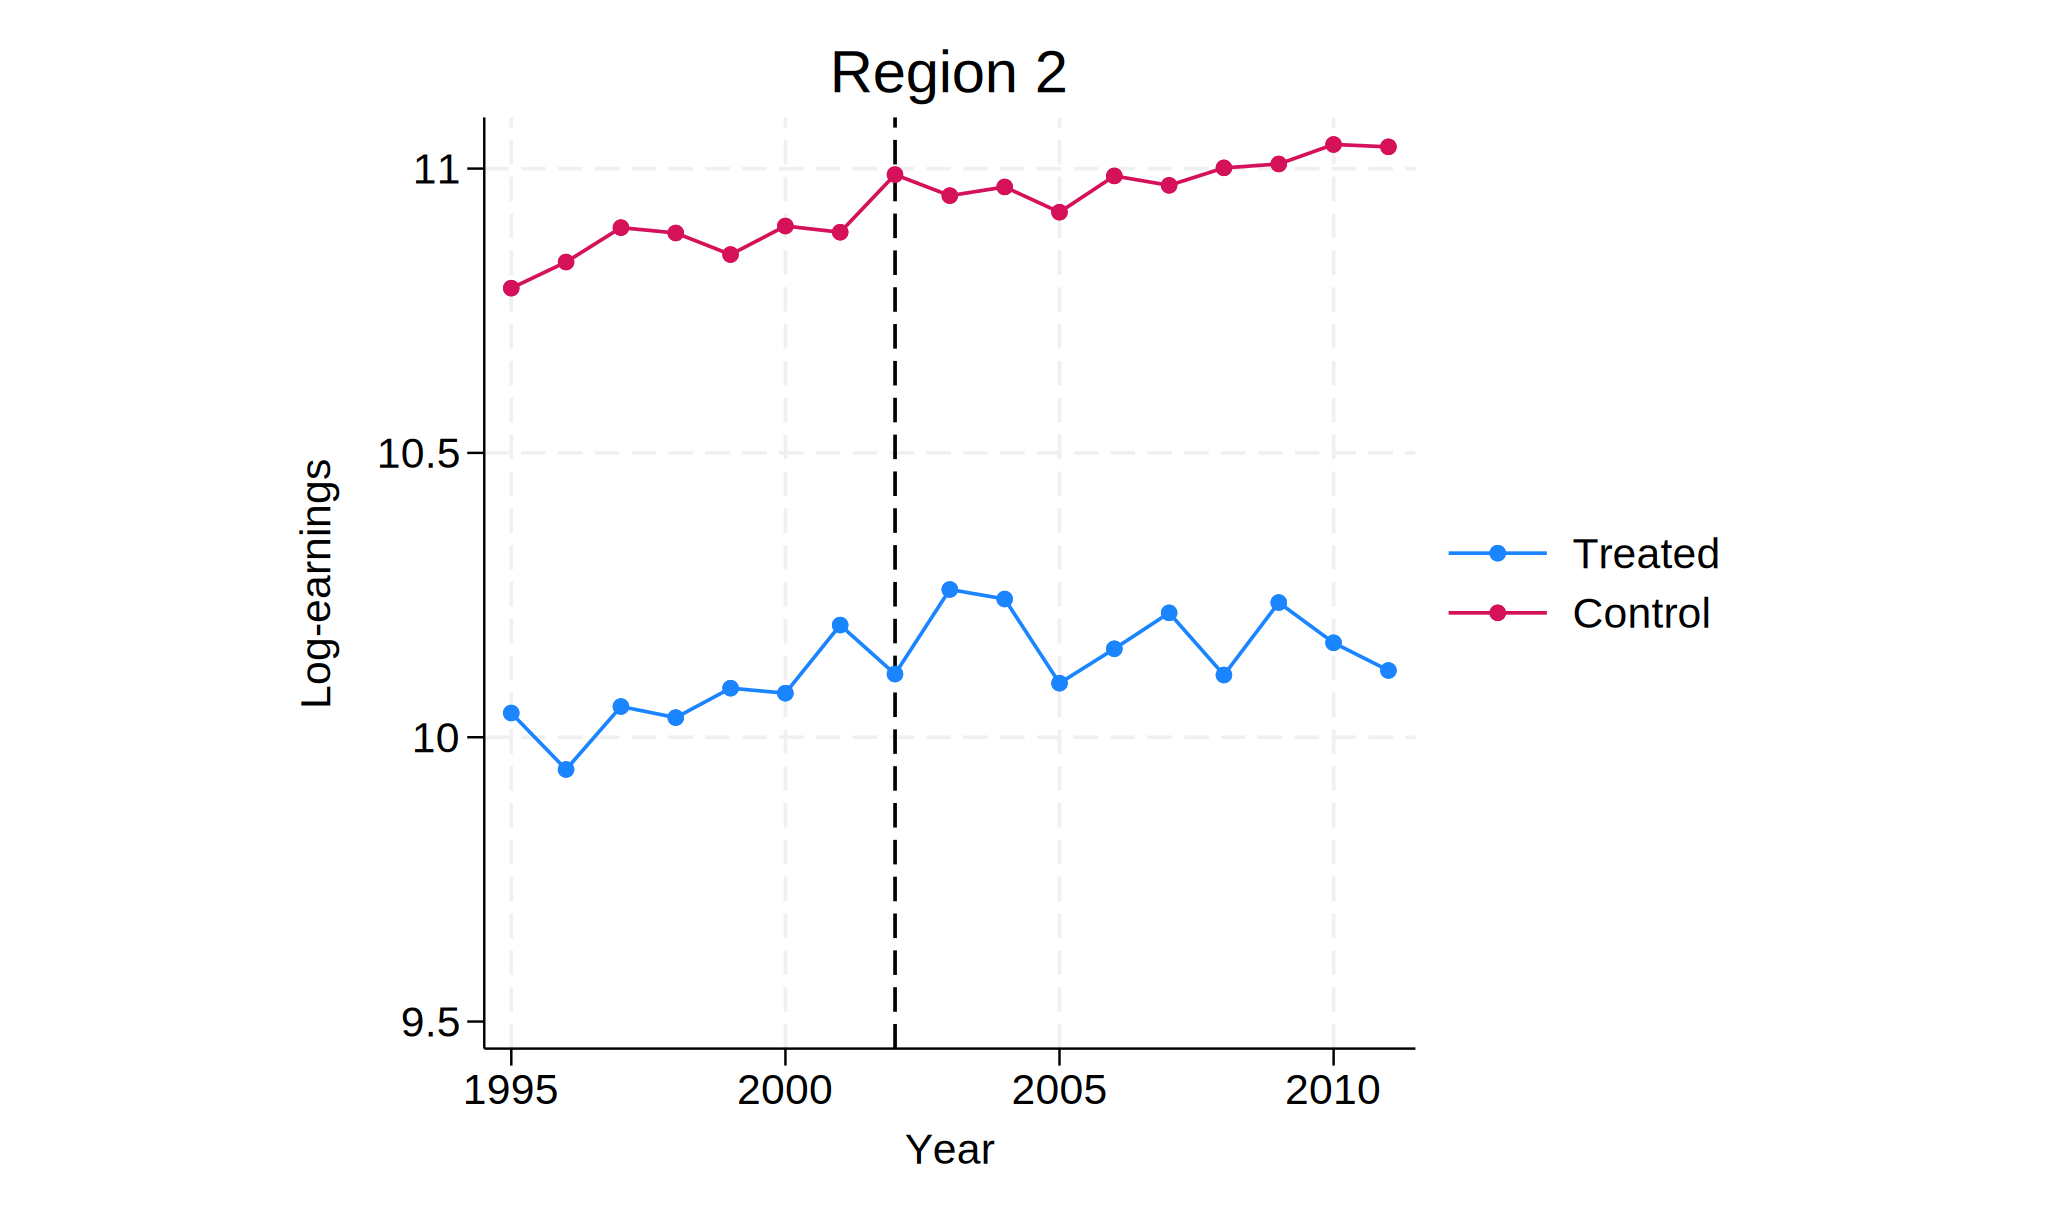

In [6]:
%%stata

*** Generate graph for Region 2 ***

twoway (connected log_earnings year if region==2 & treated) ||      ///
    (connected log_earnings year if region==2 & !treated),          ///
        xline(2002, lpattern(dash))                                 ///
        ylab(9.5(0.5)11)                                            ///
        ytitle("Log-earnings") xtitle("Year")                       ///
        legend( label(1 "Treated") label(2 "Control"))              ///
        aspectratio(1)                                              ///
        title("Region 2") name("R2", replace)

We added a number of options here to make the graphs look appealing. The best way to learn what these do is use `help twoway` and explore the options that are available. A number of these things can also be changed in the Graph Editor, but note that they will not be included in the do-file. You will want to save those files under a different name so they are not overwritten. 

Now let's see what it looks like when we combine these graphs together into one panel.


. 
. *** Combine graphs ***
. 
. graph combine R1 R2, cols(2) title("Panel A: Log-earnings by Region") saving(
> panel_a, replace)
file panel_a.gph saved

. 
. graph export graph10.jpg, as(jpg) replace
file graph10.jpg written in JPEG format

. 


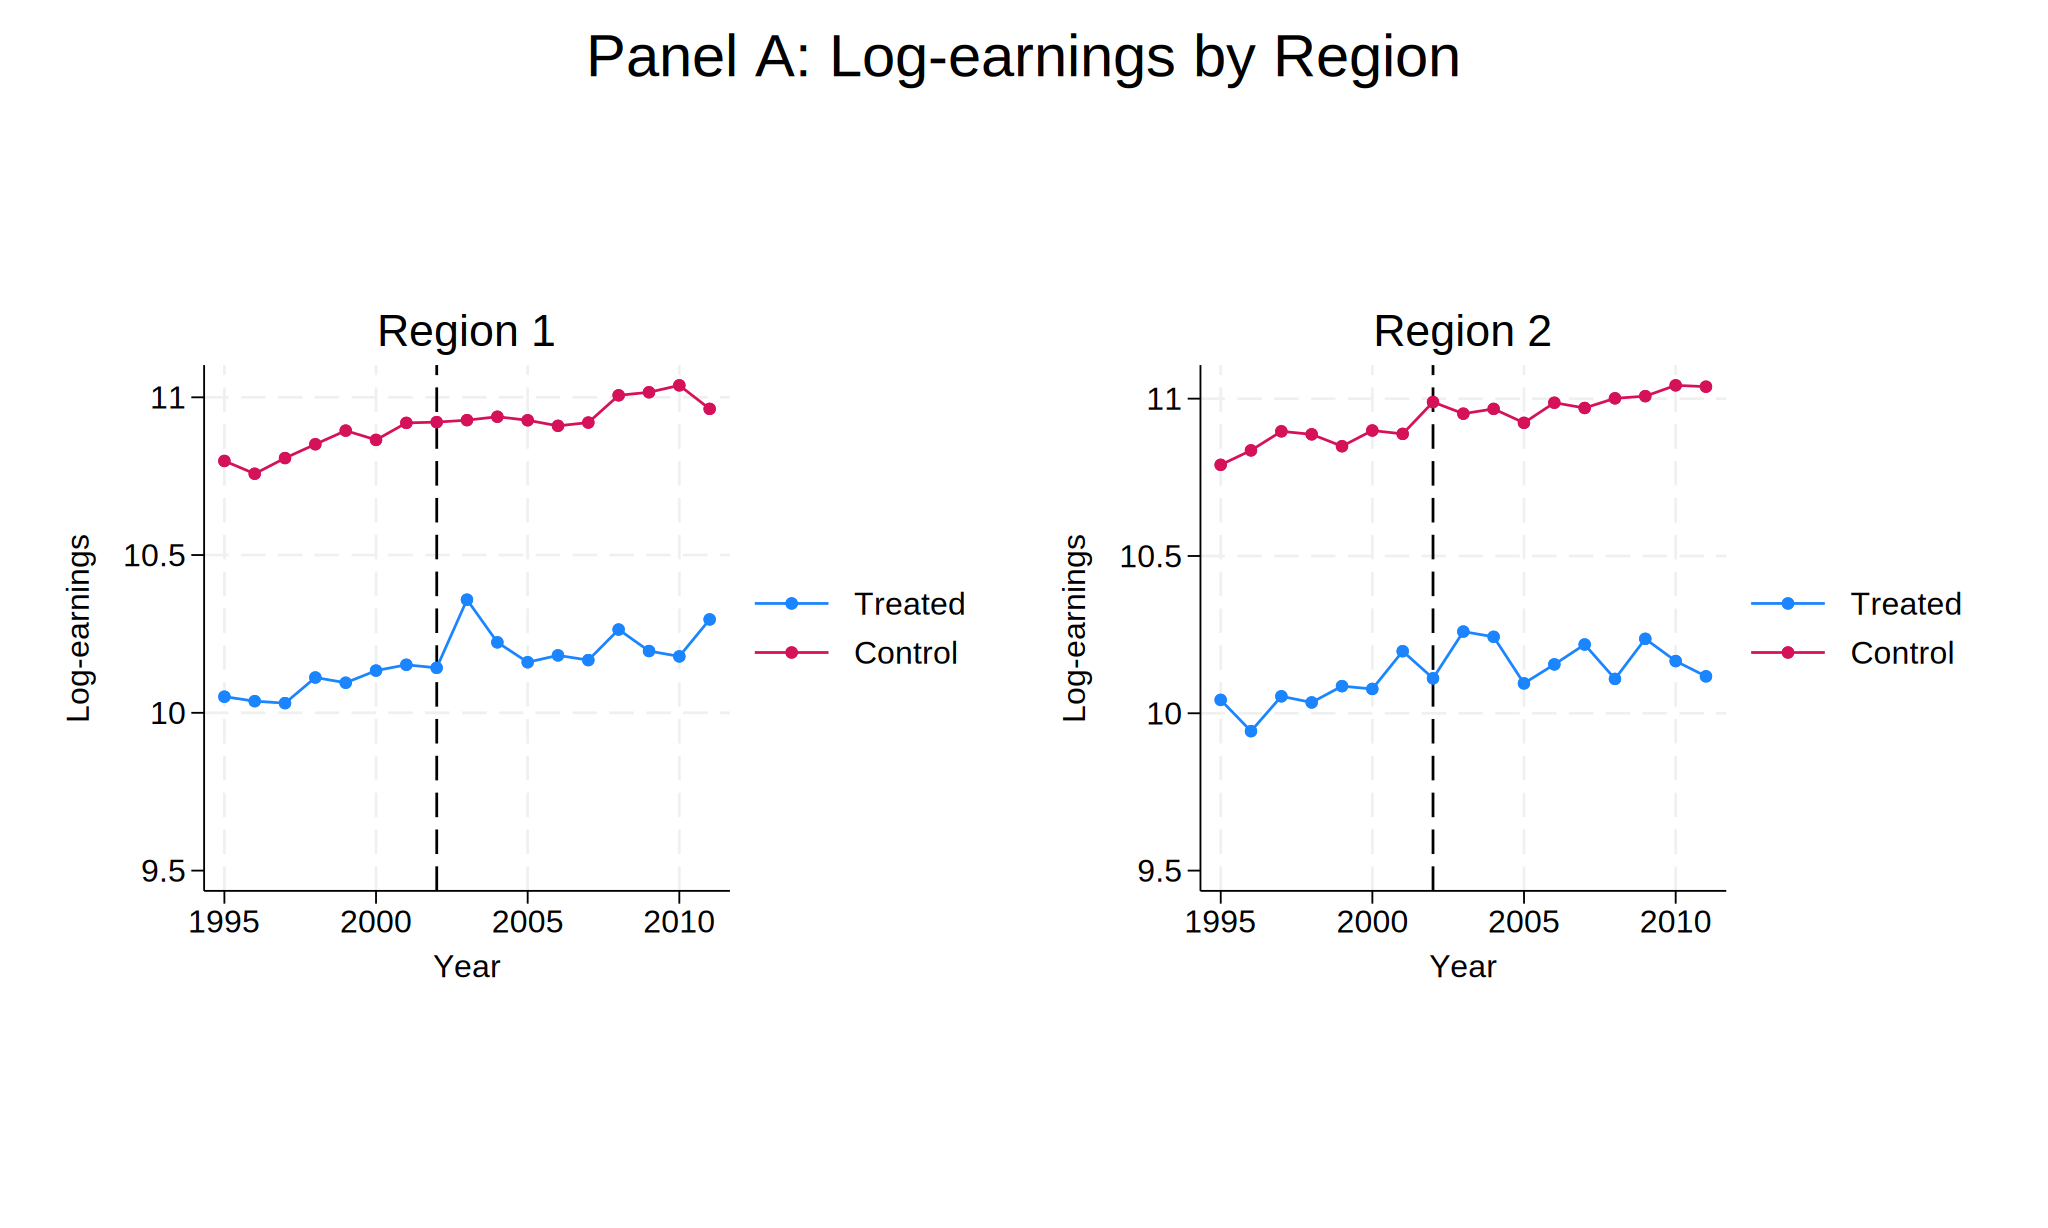

In [10]:
%%stata

*** Combine graphs ***

graph combine R1 R2, cols(2) title("Panel A: Log-earnings by Region") saving(panel_a, replace)

graph export graph10.jpg, as(jpg) replace

![Panel A](img/panel_a.svg)

## 10.2 Example 2
For this example we want to combine graphs that do not follow the same schema. Let's say we are interested in seeing if there is any relationship between the distribution of earnings (*log_earnings*) and how worker's earnings change over time in region 1. Like we saw last module, we usually use histograms to present density distribution and we can use a scatter plot or a line plot for the graph of earnings over time. We will begin by generating a histogram of log-earnings in region 1. 

In [11]:
%%stata

restore       

SystemError: 
. 
. restore       
nothing to restore
r(622);
r(622);


In [ ]:
%%stata

histogram log_earnings if region==1,   ///
    aspectratio(1)                     ///
    name("histogram1", replace)

Let's create our second graph. 

In [ ]:
%%stata

preserve              

collapse (mean) log_earnings, by(region year)

In [ ]:
%%stata

twoway (connected log_earnings year if region==1), ///
    ytitle("Log-earnings") xtitle("Year")        ///
    aspectratio(1)                               ///
    name("plot1", replace)

Now we combine `histogram1` with `plot1`. 

In [ ]:
%%stata

graph combine histogram1 plot1, cols(2) title("Region 1") name(newcombine, replace)

graph export graph10.jpg, as(jpg) replace

## 10.3 Wrap Up
In this module we learned how to use the command `generate combine`. When producing a research paper we might want to compare statistics from different countries or different regions such as GDP, population density, inflation, exports, etc. These types of graphs allow us to see how the same variables diverge between different categories (for example how earnings diverge between region 1 and 2 in ex. 1) and also can show the relationship between different variables throughout one. Understanding what graphs to use and how to portray them is of extreme importance when building a research project, which is why working alongside the `twoway` and `graph combine` documentation is always of great value.

## 10.4 Video tutorial

Click on the image below for a video tutorial on this module.

[![Combining Graphs](img/stata10.png)](https://learning.media.ubc.ca/media/Notebook+10+-+Combining+Graphs/0_bjwm4tre)

## References

[Getting started in stata (includes graphing)](https://www.youtube.com/watch?v=YAVq99iUTTI) <br>
[(Non StataCorp) Combining graphs in Stata](https://www.youtube.com/watch?v=GN9Jh7ZLauI)